In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [200]:
data = pd.read_csv("dataset_37_diabetes.csv")

In [201]:
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [202]:
classes={'tested_positive':1,'tested_negative':0}
data['class']=[classes[item] for item in data['class']]
Y=data['class']
X=data.drop(columns=['class'])
Y.value_counts()

0    500
1    268
Name: class, dtype: int64

In [203]:
# X.head()
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [204]:
data.isnull().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [205]:
data['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [206]:
data.duplicated().sum()

0

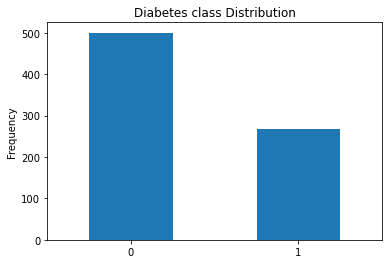

In [207]:
count_classes=pd.value_counts(data['class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Diabetes class Distribution")
plt.ylabel("Frequency")
plt.show()

In [208]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=42)
x_res,y_res=smk.fit_sample(X,Y)

In [209]:
x_res.shape,y_res.shape

((952, 8), (952,))

In [210]:
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [211]:
x_res

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.600000,0.627000,50
1,1,85,66,29,0,26.600000,0.351000,31
2,8,183,64,0,0,23.300000,0.672000,32
3,1,89,66,23,94,28.100000,0.167000,21
4,0,137,40,35,168,43.100000,2.288000,33
...,...,...,...,...,...,...,...,...
947,5,164,64,0,0,31.906102,0.233595,39
948,5,107,69,31,0,35.752773,0.278394,28
949,4,171,83,27,154,33.300000,1.196333,51
950,8,111,81,32,175,34.173097,0.284266,35


In [212]:
y_res.value_counts()

1    476
0    476
Name: class, dtype: int64

In [213]:
df=x_res

In [214]:
df['result']=y_res
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [215]:
df = df.rename(columns = {'preg': 'num_preg', 'plas': 'gluc_conc',
                           'pres':'diastolic_bp','skin':'skin_thick',
                           'insu':'insulin','mass':'bmi',
                          'pedi':'Diab_Pred'})
df.head()

,num_preg,gluc_conc,diastolic_bp,skin_thick,insulin,bmi,Diab_Pred,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [216]:
print('The mean of Glucose Concentration : {0}'.format(df['gluc_conc'].mean()))
print('The mean of Diastolic BP : {0}'.format(df['diastolic_bp'].mean()))
print('The mean of Skin Thickness : {0}'.format(df['skin_thick'].mean()))
print('The mean of Insulin : {0}'.format(df['insulin'].mean()))
print('The mean of BMI : {0}'.format(df['bmi'].mean()))
print('The mean of Diab Pedigree : {0}'.format(df['Diab_Pred'].mean()))
print('The mean of Age : {0}'.format(df['age'].mean()))

The mean of Glucose Concentration : 125.11659663865547
The mean of Diastolic BP : 69.24264705882354
The mean of Skin Thickness : 21.077731092436974
The mean of Insulin : 85.24159663865547
The mean of BMI : 32.82792384447866
The mean of Diab Pedigree : 0.5025532575363812
The mean of Age : 33.8235294117647


In [217]:
df['gluc_conc']=df['gluc_conc'].replace(0,125.12)
df['diastolic_bp']=df['diastolic_bp'].replace(0,69.24)
df['skin_thick']=df['skin_thick'].replace(0,21.1)
df['insulin']=df['insulin'].replace(0,85.24)
df['bmi']=df['bmi'].replace(0,32.83)
df['Diab_Pred']=df['Diab_Pred'].replace(0,0.503)
df['age']=df['age'].replace(0,33)

In [218]:
df.head()

,num_preg,gluc_conc,diastolic_bp,skin_thick,insulin,bmi,Diab_Pred,age,result
0,6,148.0,72.0,35.0,85.24,33.6,0.627,50,1
1,1,85.0,66.0,29.0,85.24,26.6,0.351,31,0
2,8,183.0,64.0,21.1,85.24,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.00,43.1,2.288,33,1


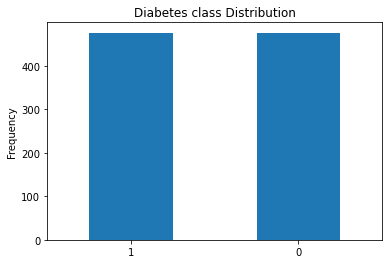

In [219]:
count_classes=pd.value_counts(df['result'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Diabetes class Distribution")
plt.ylabel("Frequency")
plt.show()


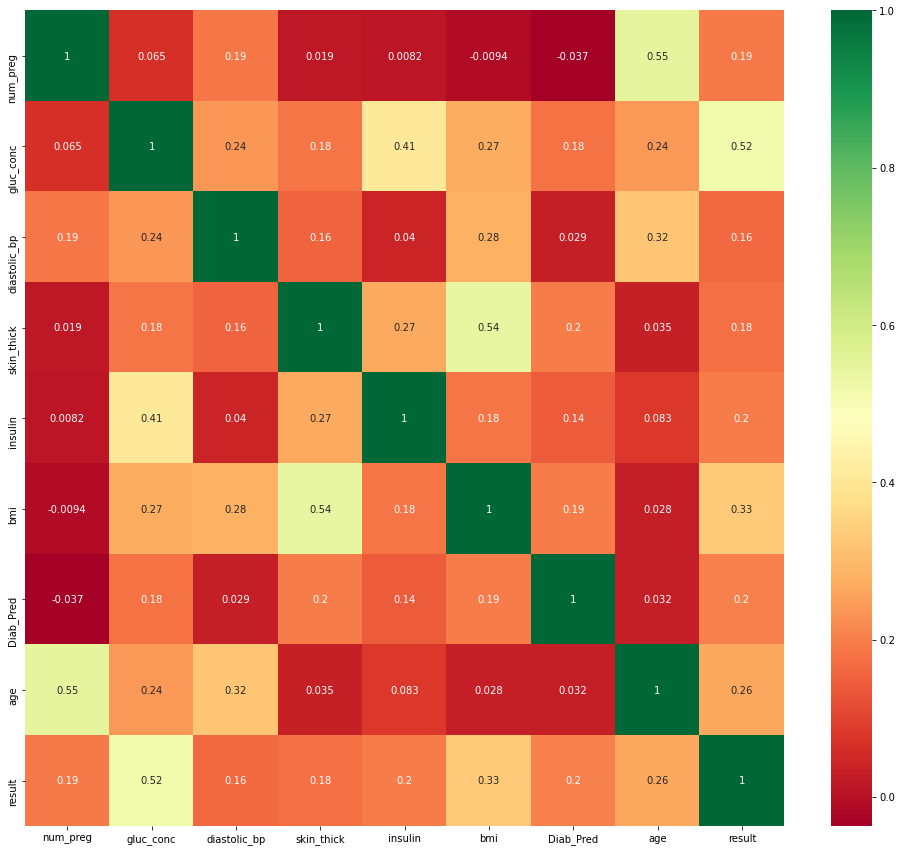

In [220]:
plt.figure(figsize=(17,15))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="RdYlGn")
plt.show()

In [231]:
x=df.drop(columns=['result']).values
y=df['result'].values
x[4]

array([  0.   , 137.   ,  40.   ,  35.   , 168.   ,  43.1  ,   2.288,
        33.   ])

In [225]:
from sklearn.model_selection import GridSearchCV,train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [226]:
print("total number of rows : {0}".format(len(df)))
print("number of rows missing glucose_conc: {0}".format(len(df.loc[df['gluc_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("number of rows missing skin_thick: {0}".format(len(df.loc[df['skin_thick'] == 0])))
print("number of rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(df.loc[df['Diab_Pred'] == 0])))
print("number of rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

total number of rows : 952
number of rows missing glucose_conc: 0
number of rows missing diastolic_bp: 0
number of rows missing skin_thick: 0
number of rows missing insulin: 0
number of rows missing bmi: 0
number of rows missing diab_pred: 0
number of rows missing age: 0


### Filling the Zero values with mean 

In [196]:
# # from sklearn.impute import SimpleImputer
# # fill_values=SimpleImputer(missing_values=0,strategy="mean")

# x_train = fill_values.fit_transform(x_train)
# x_test = fill_values.fit_transform(x_test)
# x_train[2]

## Random Forest Classifier 

In [259]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(random_state=10)
random_forest_model.fit(x_train,y_train.ravel())
prediction=random_forest_model.predict(x_test)


In [260]:
# Accuracy of model 
from sklearn import metrics 
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, prediction)))

Accuracy = 0.822


In [249]:
# Hyper parameter optimization
params={
    'criterion':['gini','entropy'],
    'max_depth':range(1,10),
    'min_samples_split':range(1,14),
    'min_samples_leaf':range(1,5)
    
}

In [250]:
gridi=GridSearchCV(random_forest_model,param_grid=params,cv=10,verbose=1,n_jobs=-1)

In [251]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [252]:
from datetime import datetime
start_time = timer(None) 
gridi.fit(x_train,y_train.ravel())
timer(start_time) 

Fitting 10 folds for each of 936 candidates, totalling 9360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3160 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3810 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4560 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5410 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6360 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7410 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8560 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 9360 out of 9360 | elapsed:  8.1min finished



 Time taken: 0 hours 8 minutes and 8.11 seconds.


In [253]:
gridi.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [254]:
gridi.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, random_state=10)

In [265]:
random_forest_model=RandomForestClassifier(criterion='gini',max_depth=8,min_samples_leaf=1,min_samples_split=2,random_state=10)

In [266]:
random_forest_model.fit(x_train,y_train.ravel())
prediction=random_forest_model.predict(x_test)
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, prediction)))

Accuracy = 0.808


In [180]:
pred=[6,98,72,35,0,33.6,0.627,20]
random_forest_model.predict([pred])[0]

0

## Decision Tree

In [235]:
from sklearn.tree import DecisionTreeClassifier
Tree_model=DecisionTreeClassifier()


In [236]:
Tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [237]:
prediction_tree=Tree_model.predict(x_test)


In [238]:
print(prediction_tree[10:25])
print(y_test[10:25])

[1 0 1 0 1 1 1 1 0 0 1 0 1 0 0]
[0 0 1 0 1 0 1 1 0 0 0 0 1 0 0]


In [239]:
metrics.accuracy_score(y_test,prediction_tree)

0.7272727272727273

In [240]:
# hyper parameter optimization
param_dict={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [241]:
grid=GridSearchCV(Tree_model,param_grid=param_dict,cv=10,verbose=3,n_jobs=-1)

In [242]:
grid.fit(x_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:    5.5s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=3)

In [243]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 7}

In [244]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_split=7)

In [245]:
Tree_model=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=1,min_samples_split=7)

In [246]:
Tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=7)

In [247]:
prediction_tree=Tree_model.predict(x_test)
metrics.accuracy_score(y_test,prediction_tree)

0.7552447552447552